In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import exposure
from skimage.measure import shannon_entropy

Perform Discrete Fourier Transform, Z- transform KL Transform on a gray scale image.


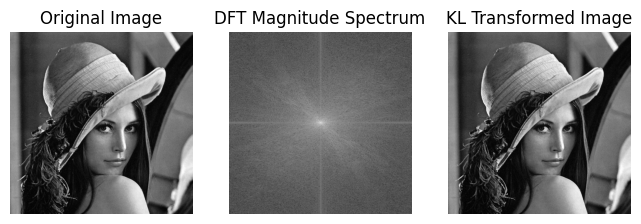

In [11]:
# Question 1
print("Perform Discrete Fourier Transform, Z- transform KL Transform on a gray scale image.")

image             = cv2.imread('lenaGrayscale.png', cv2.IMREAD_GRAYSCALE)
frequencyDomain   = np.fft.fft2(image)
shift             = np.fft.fftshift(frequencyDomain)
magnitudeSpectrum = 20 * np.log(np.abs(shift))
flatten           = image.flatten().reshape(-1, 1)
pca               = PCA(n_components=1)
result            = pca.fit_transform(flatten)
result            = result.reshape(image.shape)
plt.figure(figsize=(8, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('DFT Magnitude Spectrum')
plt.imshow(magnitudeSpectrum, cmap='gray')
plt.axis('off')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('KL Transformed Image')
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()



Implement histogram equalization and matching on a grayscale image. Compare the results visually and quantitatively using metrics like entropy.


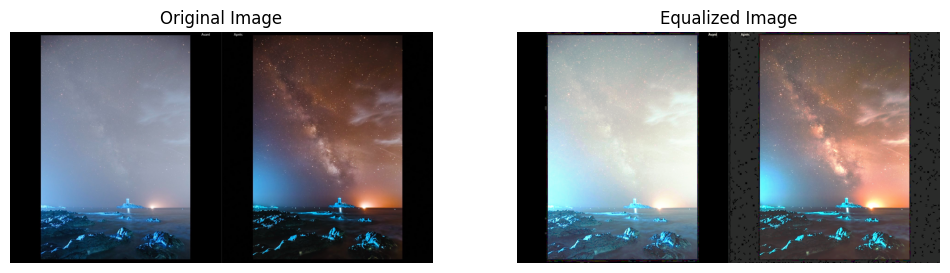

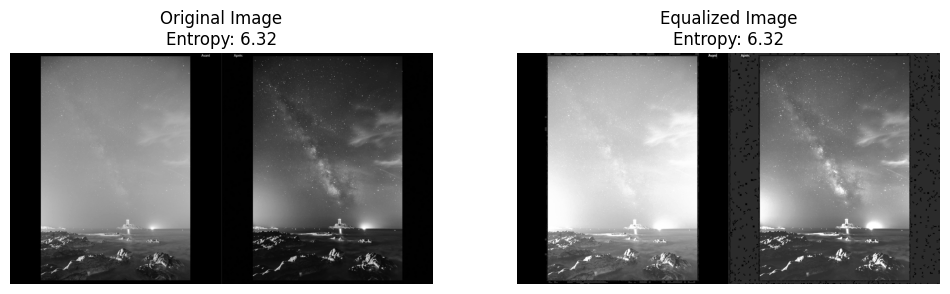

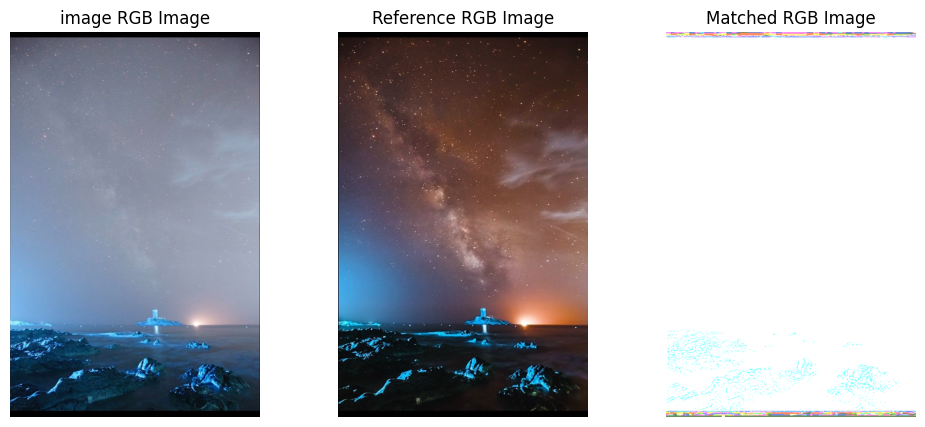

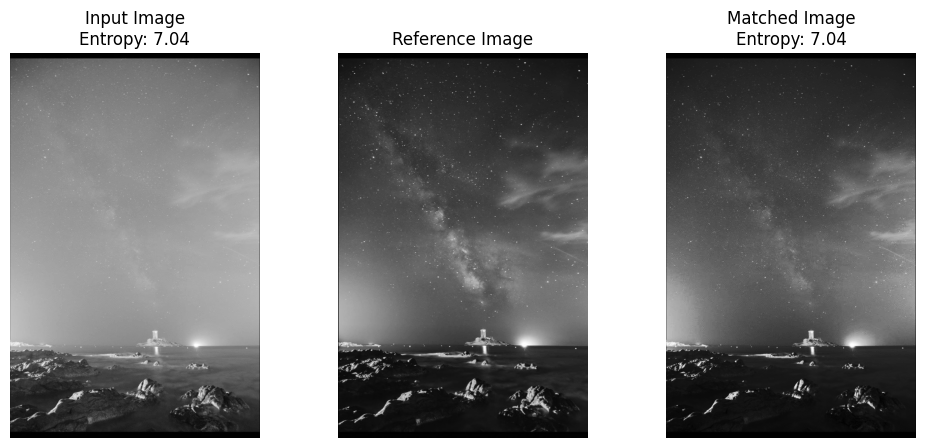

Design a contrast enhancement technique for images with low contrast. Apply it to a real-world image and evaluate its effectiveness.


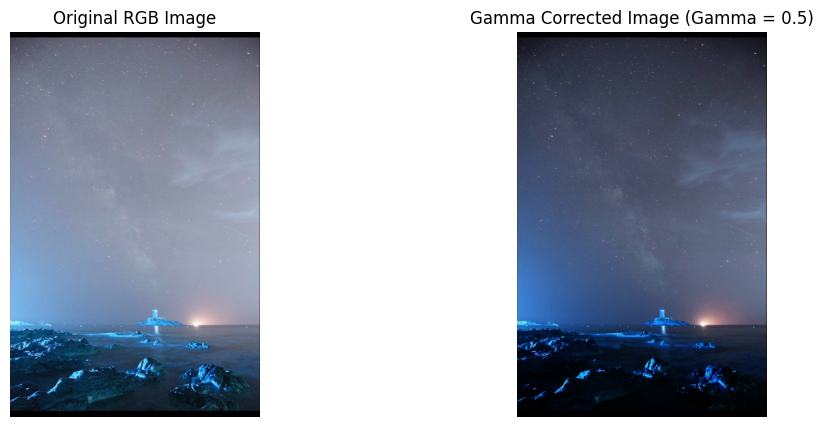

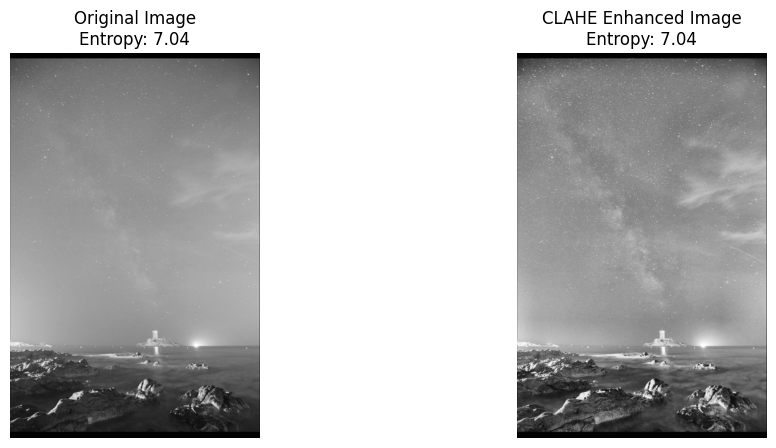

In [12]:

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Question 1
print("Implement histogram equalization and matching on a grayscale image. Compare the results visually and quantitatively using metrics like entropy.")

image    = cv2.imread('beforeAfter.jpg', cv2.COLOR_BGR2RGB)
r, g, b  = cv2.split(image)
r        = cv2.equalizeHist(r)
g        = cv2.equalizeHist(g)
b        = cv2.equalizeHist(b)
equalize = cv2.merge([r, g, b])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalize)
plt.axis('off')
plt.show()

image     = cv2.imread('beforeAfter.jpg', cv2.IMREAD_GRAYSCALE)
equalize  = cv2.equalizeHist(image)
entropy   = shannon_entropy(image)
entropy   = shannon_entropy(equalize)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title(f'Original Image\nEntropy: {entropy:.2f}')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title(f'Equalized Image\nEntropy: {entropy:.2f}')
plt.imshow(equalize, cmap='gray')
plt.axis('off')
plt.show()

image                   = cv2.imread('before.jpg', cv2.COLOR_BGR2RGB)
reference               = cv2.imread('after.jpg', cv2.COLOR_BGR2RGB)
imageR, imageG, imageB  = cv2.split(image)
referenceR, referenceG, referenceB = cv2.split(reference)
r = exposure.match_histograms(imageR, referenceR)
g = exposure.match_histograms(imageG, referenceG)
b = exposure.match_histograms(imageB, referenceB)
matched = cv2.merge([r, g, b])
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title('image RGB Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Reference RGB Image')
plt.imshow(reference)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Matched RGB Image')
plt.imshow(matched)
plt.axis('off')
plt.show()

image          = cv2.imread('before.jpg', cv2.IMREAD_GRAYSCALE)
reference      = cv2.imread('after.jpg', cv2.IMREAD_GRAYSCALE)
matched        = exposure.match_histograms(image, reference)
inputEntropy   = shannon_entropy(image)
matchedEntropy = shannon_entropy(matched)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title(f'Input Image\nEntropy: {inputEntropy:.2f}')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Reference Image')
plt.imshow(reference, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title(f'Matched Image\nEntropy: {matchedEntropy:.2f}')
plt.imshow(matched, cmap='gray')
plt.axis('off')
plt.show()

# Question 2
print("Design a contrast enhancement technique for images with low contrast. Apply it to a real-world image and evaluate its effectiveness.")

image    = cv2.imread('before.jpg', cv2.COLOR_BGR2RGB)
gammaCorrected = adjust_gamma(image, gamma=0.5)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Original RGB Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image (Gamma = 0.5)')
plt.imshow(gammaCorrected)
plt.axis('off')
plt.show()

image           = cv2.imread('before.jpg', cv2.IMREAD_GRAYSCALE)
clahe           = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
claheImage      = clahe.apply(image)
originalEntropy = shannon_entropy(image)
claheEntropy    = shannon_entropy(claheImage)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title(f'Original Image\nEntropy: {originalEntropy:.2f}')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title(f'CLAHE Enhanced Image\nEntropy: {claheEntropy:.2f}')
plt.imshow(claheImage, cmap='gray')
plt.axis('off')
plt.show()





Implement the 2D Discrete Fourier Transform (DFT) and its inverse.


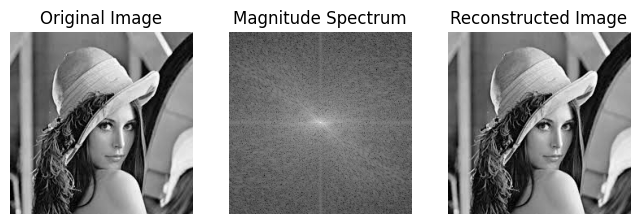

Design low-pass, high-pass, and band-pass filters in the frequency domain. Apply them to an image and analyze the results.


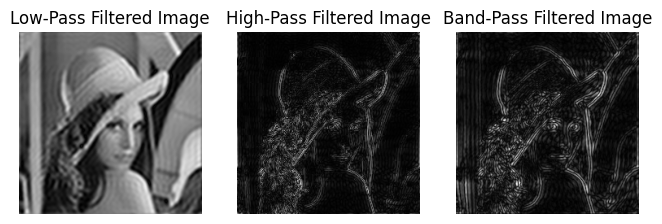

Implement homomorphic filtering and apply it to an image with uneven illumination.


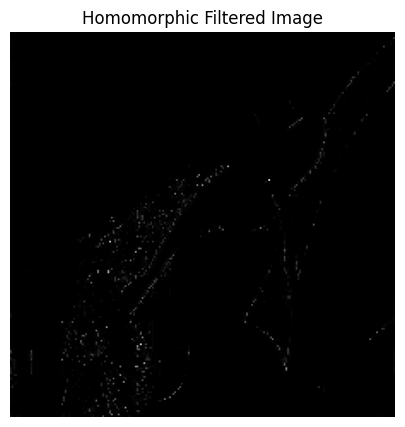

In [13]:
def low_pass(image, radius):
    rows, cols  = image.shape
    crow, ccol  = rows // 2 , cols // 2
    mask        = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    dft         = np.fft.fft2(image)
    dft         = np.fft.fftshift(dft)
    dft         = dft * mask
    idft        = np.fft.ifftshift(dft)
    idft        = np.fft.ifft2(idft)
    idft        = np.abs(idft)
    return idft

def high_pass(image, radius):
    rows, cols  = image.shape
    crow, ccol  = rows // 2 , cols // 2
    mask        = np.ones((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0
    dft         = np.fft.fft2(image)
    dft         = np.fft.fftshift(dft)
    dft         = dft * mask
    idft        = np.fft.ifftshift(dft)
    idft        = np.fft.ifft2(idft)
    idft        = np.abs(idft)
    return idft

def band_pass(image, low, high):
    rows, cols  = image.shape
    crow, ccol  = rows // 2 , cols // 2
    mask        = np.zeros((rows, cols), np.uint8)
    mask[crow-high:crow+high, ccol-high:ccol+high] = 1
    mask[crow-low:crow+low, ccol-low:ccol+low] = 0
    dft         = np.fft.fft2(image)
    dft         = np.fft.fftshift(dft)
    dft         = dft * mask
    idft        = np.fft.ifftshift(dft)
    idft        = np.fft.ifft2(idft)
    idft        = np.abs(idft)
    return idft

def homomorphic(image, low_gamma=0.5, high_gamma=2.0):
    imageLog    = np.log1p(np.array(image, dtype="float32"))
    dft         = np.fft.fft2(imageLog)
    dft         = np.fft.fftshift(dft)
    rows, cols  = image.shape
    crow, ccol  = rows // 2, cols // 2
    D0          = 30
    H           = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow)**2 + (v - ccol)**2)
            H[u, v] = 1 - np.exp(-(D**2) / (2 * (D0**2)))
    dft         = dft * H
    idft        = np.fft.ifftshift(dft)
    idft        = np.fft.ifft2(idft)
    filterLog   = np.abs(idft)
    filtered    = np.expm1(filterLog)
    filtered    = np.clip(filtered, 0, 255)
    filtered    = np.uint8(filtered)
    return filtered

# Question 1
print("Implement the 2D Discrete Fourier Transform (DFT) and its inverse.")

image = cv2.imread('fullColor.jpeg', cv2.IMREAD_GRAYSCALE)
dft = np.fft.fft2(image)
shift = np.fft.fftshift(dft)
magnitudeSpectrum = 20 * np.log(np.abs(shift))
idft = np.fft.ifftshift(shift)  # Shift back
idft = np.fft.ifft2(idft)
reconstruction = np.abs(idft)
plt.figure(figsize=(8, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitudeSpectrum, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Reconstructed Image')
plt.imshow(reconstruction, cmap='gray')
plt.axis('off')
plt.show()

# Question 2
print("Design low-pass, high-pass, and band-pass filters in the frequency domain. Apply them to an image and analyze the results.")

lowPassImage = low_pass(image, radius=30)
highPassImage = high_pass(image, radius=30)
bandPassImage = band_pass(image, low=20, high=60)
plt.figure(figsize=(8, 5))
plt.subplot(1 , 3 , 1)
plt.title('Low-Pass Filtered Image')
plt.imshow(lowPassImage, cmap='gray')
plt.axis('off')
plt.subplot(1 , 3 , 2)
plt.title('High-Pass Filtered Image')
plt.imshow(highPassImage, cmap='gray')
plt.axis('off')
plt.subplot(1 , 3 , 3)
plt.title('Band-Pass Filtered Image')
plt.imshow(bandPassImage, cmap='gray')
plt.axis('off')
plt.show()

# Question 3
print("Implement homomorphic filtering and apply it to an image with uneven illumination.")

result = homomorphic(image)
plt.figure(figsize=(8, 5))
plt.title('Homomorphic Filtered Image')
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()





Implement color space conversions between RGB, HSI, and YCbCr color models.
Perform color histogram equalization on a color image and analyze the results


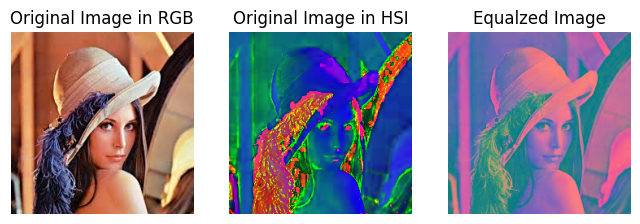

Implement color edge detection using Sobel or Canny operators.


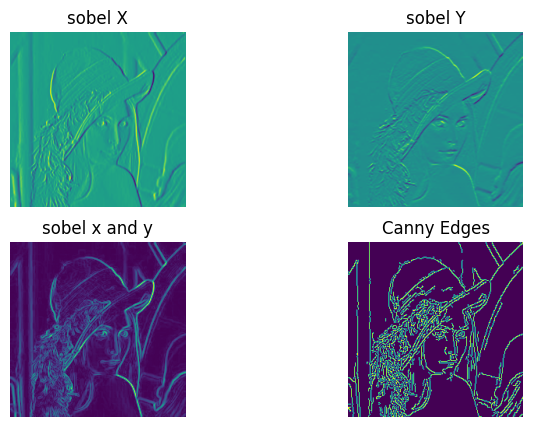

In [31]:
def rgb_to_hsi(image):
    with np.errstate(divide='ignore', invalid='ignore'):
        R = image[:, :, 0] / 255.0
        G = image[:, :, 1] / 255.0
        B = image[:, :, 2] / 255.0
        I = (R + G + B) / 3.0
        minRGB = np.minimum(np.minimum(R, G), B)
        S = 1 - (3 / (R + G + B + 1e-10)) * minRGB
        num = 0.5 * ((R - G) + (R - B))
        denom = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-10
        theta = np.arccos(num / denom)
        H = np.zeros_like(R)
        H[B <= G] = theta[B <= G]
        H[B > G] = (2 * np.pi) - theta[B > G]
        H = H / (2 * np.pi)
        HSI = np.stack((H, S, I), axis=2)
        return HSI

# Question 1
print("Implement color space conversions between RGB, HSI, and YCbCr color models.")

image   = cv2.imread('fullColor.jpeg', cv2.IMREAD_COLOR)
rgb   = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsi = rgb_to_hsi(rgb)

# Question 2
print("Perform color histogram equalization on a color image and analyze the results")

ycbcr = cv2.cvtColor(rgb, cv2.COLOR_BGR2YCrCb)
ycbcr[:, :, 0] = cv2.equalizeHist(ycbcr[:, :, 0])
equalized = cv2.cvtColor(ycbcr, cv2.COLOR_YCrCb2BGR)
plt.figure(figsize=(8, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image in RGB')
plt.imshow(rgb)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Original Image in HSI')
plt.imshow(hsi)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Equalzed Image')
plt.imshow(ycbcr)
plt.axis('off')
plt.show()

# Question 3
print("Implement color edge detection using Sobel or Canny operators.")

gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobelEdge = np.sqrt(sobelx**2 + sobely**2)
plt.figure(figsize=(8, 5))
plt.subplot(2, 2, 1)
plt.title('sobel X')
plt.imshow(sobelx)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('sobel Y')
plt.imshow(sobely)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('sobel x and y')
plt.imshow(sobelEdge)
plt.axis('off')
cannyEdge = cv2.Canny(rgb, 100, 200)
plt.subplot(2, 2, 4)
plt.title('Canny Edges')
plt.imshow(cannyEdge)
plt.axis('off')
plt.show()



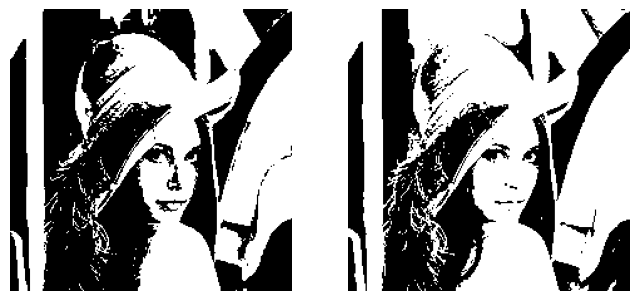

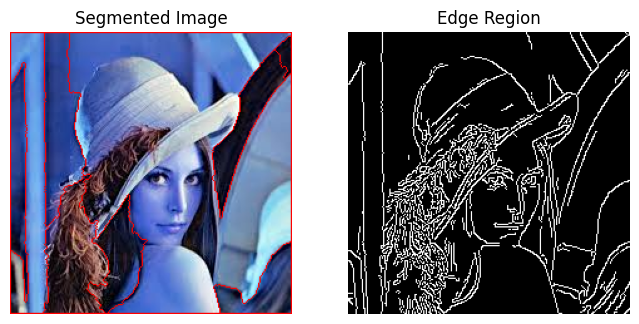

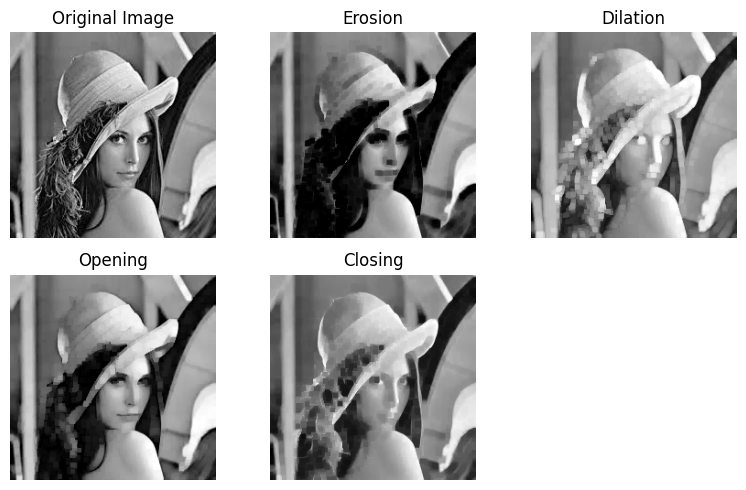

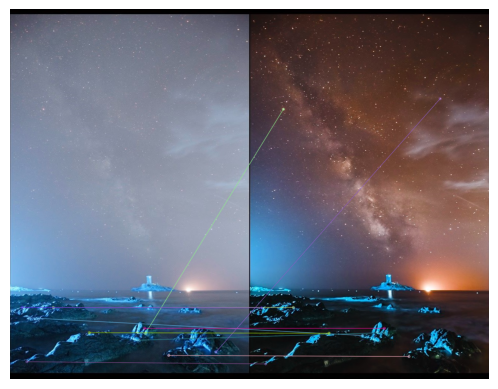

In [56]:
# Question 1
print("")

image       = cv2.imread('fullColor.jpeg', cv2.IMREAD_GRAYSCALE)
_, thresh   = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
otsuThreshold, otsuImage = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(otsuImage, cmap='gray')
plt.axis('off')
plt.show()
rgb       = cv2.imread('fullColor.jpeg', cv2.IMREAD_COLOR)
image     = cv2.cvtColor(rgb , cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
sureBG = cv2.dilate(binary, kernel, iterations=3)
distTransform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sureFG = cv2.threshold(distTransform, 0.7*distTransform.max(), 255, 0)
sureFG = sureFG.astype(np.uint8)
unknown = cv2.subtract(sureBG, sureFG)
markers = cv2.connectedComponents(sureFG.astype(np.uint8))[1]
markers = markers + 1
markers[unknown == 255] = 0
cv2.watershed(rgb, markers)
rgb[markers == -1] = [255, 0, 0]
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('Segmented Image')
plt.imshow(rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Edge Region')
edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

# Question 2
print("")

image = cv2.imread('fullColor.jpeg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(image, kernel, iterations=1)
dilation = cv2.dilate(image, kernel, iterations=1)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(8, 5))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(closing, cmap='gray')
plt.title('Closing')
plt.axis('off')
plt.tight_layout()
plt.show()

# Question 3
print("")

import cv2

image1 = cv2.imread('before.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('after.jpg', cv2.IMREAD_COLOR)
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(image1, None)
kp2, des2 = orb.detectAndCompute(image2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
image3 = cv2.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=2)
plt.imshow(image3)
plt.axis('off')
plt.show()

